# Detectando Fraudes em cartões de Crédito

Nesse projeto, iremos abordar o problema de frudes em cartões de créditos, atualmente uma das principais preocupações das instituições financeiras, como bancos e fintechs. No Brasil sofreu um aumento de quase 33% nas tentativas de fraudes em e-commerce no primeiro semestre de 2021, em comparação com ano passado, conforme mostra estudo, foram 2,6 milhões de tentativas, e considerando 182 milhões de transações via cartão de crédito.

<p align="center">
  <img src="https://image.freepik.com/vetores-gratis/ataque-de-hackers-crime-na-internet-ilustracao-vetorial-fraude-de-carater-criminoso-com-seguranca-de-telefone-roubo-de-cartao-e-dinheiro-mulher-pequena-fica-perto-de-smartphone-olha-para-o-grupo-de-ladroes-ciberneticos_109722-3667.jpg" alt="imagem_Fraudes_Cartao"height=400px >
</p>

As fraudes envolvendo cartão de crédito são de grande relevãncia, uma vez que sua não detecção acaretará em prejuiso consideraveis, tanto para o consumidor, quanto para instituição financeira.

Um outro fator consideravel, é o falso positivo, ou seja, aquela vez em que você tenta fazer uma compra, e teve seu cartão de crédito bloqueado preventivamente, o que provavelmente gerou transtornos.

Por esses motivos, o investimento na área de detecção de fraudes, por meio da Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade para Ciências de Dados.

Os pontos que serão abordados nesse projeto:

* Analise Exploratório dos Dados
* Preparação dos Dados
* Divídir entre conjuntos de Treino e Validação
* Balanceamento dos Dados
* Avaliar o desempenho do modelo de Machine Learning
* Fazendo previsão no conjunto de teste

## Analise Exploratória dos dados

Os dados que usaremos nesse projeto foram disponibilizados por algumas empresas financeiras européia de cartão de crédito. O dataset representa as operações que aconteceram no periódo de dois dias, onde foram classificados 492 fraudes em meio a quese 290 mil transações.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas ligados a privacidade e segurança).

<p align="center">
  <img src="https://image.freepik.com/vetores-gratis/hacker-e-criminosos-ciberneticos-que-roubam-dados-pessoais-privados-login-de-usuario-senha-documento-e-mail-e-cartao-de-credito-phishing-e-fraude-golpe-e-roubo-online-hacker-sentado-na-mesa_435184-583.jpg" alt="imagem_Fraudes_Cartao"height=400px >
</p>

O dataset está disponivel públicamente no site do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), que pode ser analisado com mais detalhes .

#### Importando os Dados
Nessa etapa estamos importando os dados para dento do DataFrame, já separamos os dados que serão utilizados para Treino e Teste, no deccorer do projeto.

As primeiras entradas permitem entender a descaracterização dos dados, em valores numéricos, para manter de forma anonima as informações.

Nas colunas `Time` e `Amount`foram preservadas, mantendo os valores originais, e a variável `Class` que é nosso alvo, onde:

    * 0: Transação normal
    * 1: Transação fraudulenta

In [48]:
# importando os pacotes necessarios

# analise e manipulacao dos dados
import pandas as pd
# Criacao de grafico e visualizacao de dados
import matplotlib.pyplot as plt
# visualizacao de dados baseado em matplotlib
import seaborn as sns
# grande volume de dados, trabalha com matrizes 
import numpy as np
# Visualizar dados e modelos durante o treinamento
import scikitplot as skplt

# Scikit-learn eh uma biblioteca para modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# classificacao de classes desabalanceadas
from imblearn.under_sampling import RandomUnderSampler

# importando dataset para o dataframe
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Dimensoes do dataset
print('Dimensão do Dataset original: \n'
    'Variáveis: {}'.format(df.shape[1]), '\n'
    'Entradas: {}'.format(df.shape[0]))

# criar conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print('\nDimensão do conjunto de teste: \n' 
      'Variáveis: {}'.format(test.shape[1]), '\n'
     'Entradas: {}'.format(test.shape[0]))
print('\nDimensão do conunto de treino:\n'
      'Variáveis: {}'.format(df.shape[1]), '\n'
     'Entradas: {}'.format(df.shape[0]))

# Primeiras 5 linhas
print("\nPrimeiras linhas do dataset:")
df.head()

Dimensão do Dataset original: 
Variáveis: 31 
Entradas: 284807

Dimensão do conjunto de teste: 
Variáveis: 31 
Entradas: 42721

Dimensão do conunto de treino:
Variáveis: 31 
Entradas: 242086

Primeiras linhas do dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
# mostrar as ultimas linhas do dataset
print('\nÚltimas linhas do Dataset:')
df.tail()


Últimas linhas do Dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Mostrando informações do nosso DataFrame, todas as variáveis de forma numérica.

In [50]:
# informacoes do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242086 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    242086 non-null  float64
 1   V1      242086 non-null  float64
 2   V2      242086 non-null  float64
 3   V3      242086 non-null  float64
 4   V4      242086 non-null  float64
 5   V5      242086 non-null  float64
 6   V6      242086 non-null  float64
 7   V7      242086 non-null  float64
 8   V8      242086 non-null  float64
 9   V9      242086 non-null  float64
 10  V10     242086 non-null  float64
 11  V11     242086 non-null  float64
 12  V12     242086 non-null  float64
 13  V13     242086 non-null  float64
 14  V14     242086 non-null  float64
 15  V15     242086 non-null  float64
 16  V16     242086 non-null  float64
 17  V17     242086 non-null  float64
 18  V18     242086 non-null  float64
 19  V19     242086 non-null  float64
 20  V20     242086 non-null  float64
 21  V21     24

Como o dataset já teve seu dados tratados, não possui nenhum valor ausente, ajudando na qualidade do dataset e facilitando nossa analise e treinamento dos modelos.

In [51]:
# verificar valores ausentes
df.isnull().sum().max()
# Porcentagem
#(df.isnull().sum() / df.shape[0] * 100).max()

0

Resumo estatístico por meio do método `describe()`, percebemos que não tem nenhuma descrepância aparente. Em relação a variável `Amount`, nota se que o valor médio de transações (considerando ambas as Classes), é 88,61, a mediana de 22,00, e o desvio padrão de 247,66, atingindo o valor máximo de 19656.53.

In [52]:
# Resumo das estatisticas
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,...,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00,242086.00
mean,94857.60,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,88.61,0.00
std,47490.66,1.96,1.65,1.51,1.42,1.37,1.33,1.22,1.20,1.10,...,0.73,0.73,0.63,0.61,0.52,0.48,0.40,0.33,247.66,0.04
min,0.00,-56.41,-72.72,-33.68,-5.68,-42.15,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.82,-10.30,-2.60,-22.57,-11.71,0.00,0.00
25%,54234.00,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.65,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.66,0.00
50%,84747.00,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139362.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.58,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,23.92,44.05,20.01,15.59,...,27.20,10.50,22.53,4.02,7.52,3.52,12.15,33.85,19656.53,1.00


Visualizar as colunas numéricas para gerar um gráfico de barras.

In [53]:
# selecionar as colunas numericas para gerar grafico de barras
df.select_dtypes(include='int').columns

Index(['Class'], dtype='object')

O gráfico de barras mostra a discrepância de forma nitida e visivel entre transações normais e fraudulentas, as fraudes representam 0.17%, e as transações normais 99.8% do dataset.
Na prática isso interfere o desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de limentar o modelo.

Dataset com 242086 total entradas.
Total de entradas normal, sem fraude: 241668
Total de entradas com fraude: 418
Fraudes representam 0.1727% do dataset:
Transações normais representam 99.8273% do dataset.


/home/thiago/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


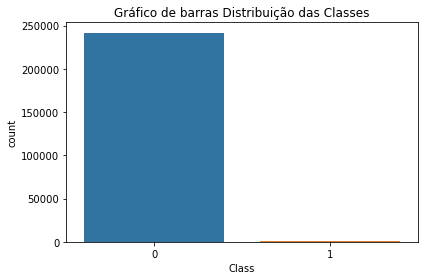

In [117]:
# grafico de barras
# Class == 1 = Fraude
# Class == 0 = Normal
# Porcentagem de fraudes e nao fraldes
print('Dataset com {} total entradas.'.format(df.Class.shape[0]))
print('Total de entradas normal, sem fraude: {}'.format(df.Class[df.Class == 0].count()))
print('Total de entradas com fraude: {}'.format(df.Class[df.Class == 1].count()))
print('Fraudes representam {:.4f}% do dataset:'.format((df.Class[df.Class == 1].shape[0]) / 
                                                       df.Class.shape[0] * 100))
print('Transações normais representam {:.4f}% do dataset.'.format(df.Class[df.Class == 0].shape[0] / 
                                                                  df.Class.shape[0] * 100))
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Gráfico de barras Distribuição das Classes')
plt.tight_layout()

Gráfico a fim de comprar as distribuições das 2 classes ao longo da dimensão tempo (`Time`).

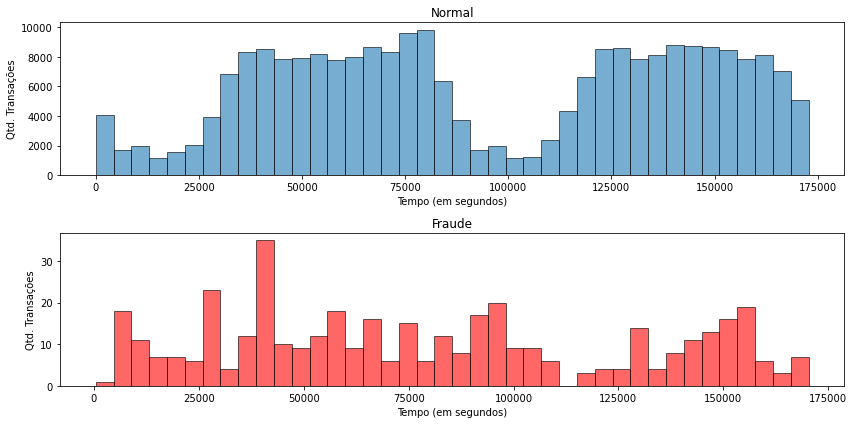

In [86]:
# Plotar histograma transações por tempo

num_bins = 40
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
ax[0].hist(df.Time[df.Class == 0], bins=num_bins, ec='k', alpha=.6)
ax[0].set_title('Normal')
ax[0].set_xlabel('Tempo (em segundos)')
ax[0].set_ylabel('Qtd. Transações')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, ec='k', alpha=.6, color='red')
ax[1].set_title('Fraude')
ax[1].set_xlabel('Tempo (em segundos)')
ax[1].set_ylabel('Qtd. Transações')

plt.tight_layout()

Histograma que mostra ditribuição das classes com a variável `Amount`.

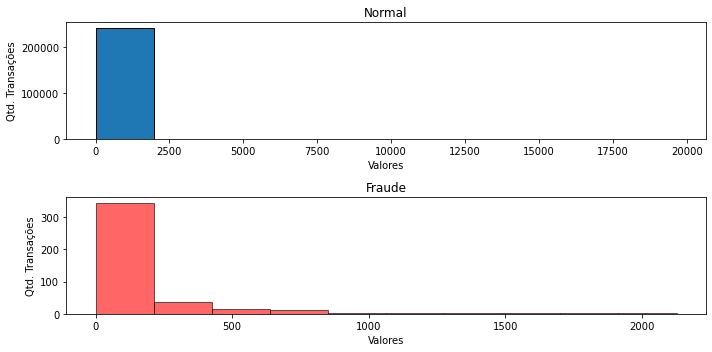

In [130]:
# plot histograma 'Amount'
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5))

ax[0].hist(df.Amount[df.Class == 0], ec='k')
ax[0].set_title('Normal')
ax[0].set_xlabel('Valores')
ax[0].set_ylabel('Qtd. Transações')

ax[1].hist(df.Amount[df.Class == 1], ec='k', alpha=.6, color='red')
ax[1].set_title('Fraude')
ax[1].set_xlabel('Valores')
ax[1].set_ylabel('Qtd. Transações')

plt.tight_layout()

Seguindo com a analise, plotou-se os boxplots para ver se há alguma diferença no padrão de transações em relação a dimensão da variável `Amount`.
De maneira geral, percebe-se uma distribuição diferente para as duas classes, o que irá contribuir para o treinamento do modelo de machine learning.

/home/thiago/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


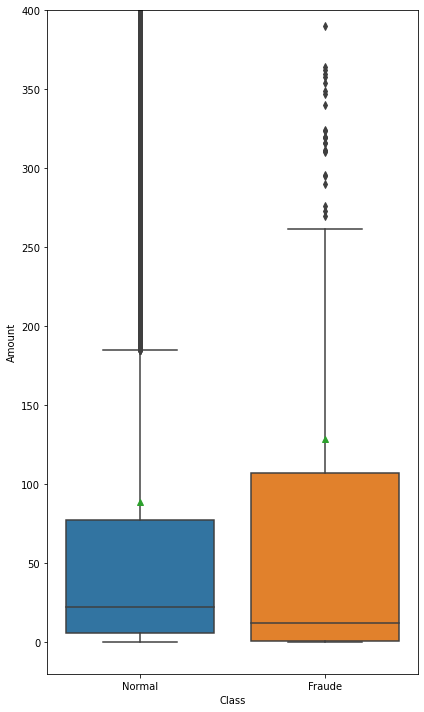

In [58]:
# plotar grafico de boxplot
fig, ax = plt.subplots(figsize=(6,10), sharex=True)
sns.boxplot(df.Class, df.Amount, ax=ax, showmeans=True)
plt.ylim((-20,400))
plt.xticks([0,1],['Normal', 'Fraude'])
#df.Amount[df.Class == 1].plot(kind='box', vert=False, figsize=(12,4))

plt.tight_layout()

Resumidamente, algumas observações que podem ser extraídas dessa estapa explratória:
   * O dataset está muito desbalanceado, uma vez que a transações fraudulentas representam apenas 0.17% das entradas totais.
   * Não existe valores ausentes ou nulos no dataframe.

## Preparação dos Dados

Para que os dados possam alimentar o modelo de Regressão que iremos construir, nessa etapa de preparação iremos:
   * Padronizar as features `Time` e `Amount`, que estão em outra ordem de grandeza.
   * Dividir entre dados de treino e teste.
   * Balancear os dados a fim de evitar uma baixa performanse para a classe 1.

In [60]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primerias entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


## Divídir entre conjuntos de Treino e Validação
Antes de proceder com o balanceamento dos dados, devemos dividir os dados já existentes entre Treino e Validação.
Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=y'.

In [61]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e validacao
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

## Balanceamento dos dados

Com o balanceamento dos dados, é fácil ver que não há mais aquela discrepância inicial, apresentado no gráfico de barras no inicio de notebook.

0    313
1    313
Name: Class, dtype: int64


/home/thiago/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

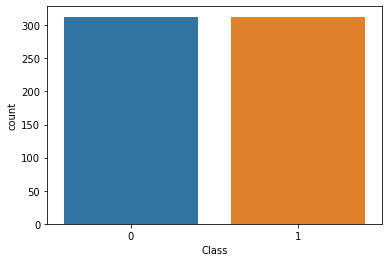

In [62]:
# utilizar tecnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuicao das clesses
sns.countplot(y_rus)

Com os dados balanceados, podemos ver a matriz de correlação, e identificar quais variáveis estão mais fortemente relacinados com as outras, a baixo matriz desbalanceade e balanceada, após o tratamento.

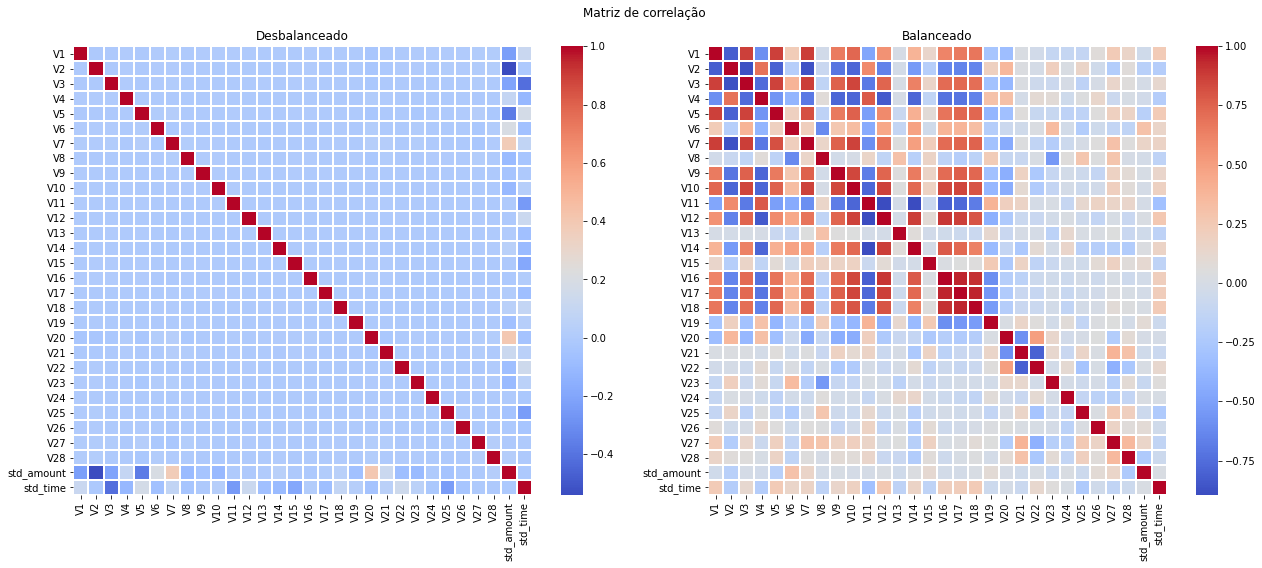

In [63]:
# plotar matriz de correlacao
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('Matriz de correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           linewidths=1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
           linewidths=1, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Balanceado')

plt.tight_layout()

## Avaliar o desempenho do modelo de Machine Learning

Com os dados preparados, irei construir um classificador usando Regressão Logística.
Após instanciar o modelo, o mesmo será treinado em cima dos dados em X_rus e y_rus. Na sequência serão realizado as previsões, sobre o dado de Teste.

In [81]:
# instanciar e treinar modelo de regressao linear
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer previsao em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Com o modelo treinado, e as previsões feitas, partir para a avaliação de desempenho.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9726    0.9860     60417
           1     0.0537    0.8952    0.1012       105

    accuracy                         0.9724     60522
   macro avg     0.5267    0.9339    0.5436     60522
weighted avg     0.9982    0.9724    0.9845     60522

Acurácia: 0.9724

AUC: 0.9339


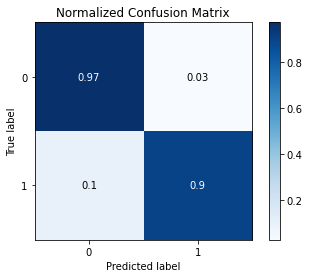

In [83]:
# plotar a matrix de confusao
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir o relatorio de classificacao
print('Relatório de Classificação: \n', classification_report(y_val, y_pred, digits=4))

# imprimir a acuracia de modelo
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_val, y_pred)))

# imprimir a area sob da curva
print('AUC: {:.4f}'.format(roc_auc_score(y_val, y_pred)))

## Fazendo previsão no conjunto de teste
No começo do projeto, foi dividido os dados, para que tivéssemos 3 conjuntos: De Treino, Validação e de Teste.

Agora que já exploramos e preparamos os dados, instanciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desse simples modelo, com os dados de teste.

O que faremos é apenas utilizar o modelo que treinamos com um novo conjunto, mas precisamos deixar os novos dados nas mesma condições.

In [66]:
# padronizar a coluna Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora separar entre X e Y, e fazer as novas previsões.

In [67]:
# separar variavel entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

# fazer as previsões em cima dos dados de test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Agora é hora de visualizar o resultado.

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9738    0.9866     42647
           1     0.0573    0.9189    0.1079        74

    accuracy                         0.9737     42721
   macro avg     0.5286    0.9464    0.5473     42721
weighted avg     0.9982    0.9737    0.9851     42721

Acurácia: 0.9737

AUC: 0.9464


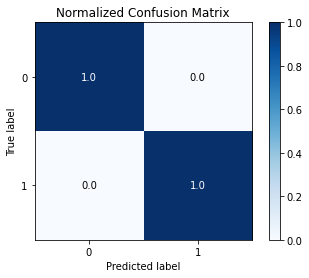

In [72]:
# plotar matriz de confusao
skplt.metrics.plot_confusion_matrix(y_pred, y_pred, normalize=True)

# imprimir relatorio de classificao
print('Relatório de Classificação: \n', classification_report(y_test, y_pred, digits=4))

# importar as acuracio do modelo
print('Acurácia: {:.4f}\n'.format(accuracy_score(y_test,y_pred)))

# importar a areh sobre a curva
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

## Conclusão

Um bom modelo de Machine Learning pode ter muitos benefícios para as empresas, entender o modelo de negócio de cada empresa, pode facilitar o desenvolvimento do modelo certo, nesse projeto os dados já foram disponibilizados de forma bem tratado e limpo, facilitando o desenvolvimento do projeto.